## Imports

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

## Read data file

In [ ]:
file = "Stripe-82/stripe82_data.csv"
df = pd.read_csv(file, dtype=object)

## Data Org Functions

In [ ]:
## Not needed when plotting both peaks in the same plot, but the function
## are pretty neat!! :) Let them remain!

df_to_np = lambda filt, s : np.array(list(
    map(lambda x : float(x),
       list(df[filt][s]))
))

colsN = lambda cols, n : list(map(lambda s : s+str(n), cols))
get_data = lambda filt, cols : {
    n : {c:df_to_np(filt, cn) for c, cn in zip(cols, colsN(cols, n))}
    for n in [1, 2]
}

# **Valid PhotoZ**

These are objects for which both the peaks have valid photoZ (not -9999)

## Data dictionary of valid photoZ

In [ ]:
pz = (df['photoZ1'] != '-9999') & (df['photoZ2'] != '-9999')
pz_cols = ['photoZ', 'photoZ_err', 'absMagR', 'u', 'g', 'r', 'i', 'z']

photo_zs = []
us, gs, rs, iis, zs = [], [], [], [], []
absMagRs = []

for i, row in df[pz].iterrows() :
    if row['pid1'] == row['pid2'] :
        photo_zs.append(float(row['photoZ1']))
        
        us.append(float(row['u1']))
        gs.append(float(row['g1']))
        rs.append(float(row['r1']))
        iis.append(float(row['i1']))
        zs.append(float(row['z1']))
        
        absMagRs.append(float(row['absMagR1']))
    else :
        photo_zs += [float(row['photoZ1']), float(row['photoZ2'])]
        
        us += [float(row['u1']), float(row['u2'])]
        gs += [float(row['g1']), float(row['g2'])]
        rs += [float(row['r1']), float(row['r2'])]
        iis += [float(row['i1']), float(row['i2'])]
        zs += [float(row['z1']), float(row['z2'])]
        
        absMagRs += [float(row['absMagR1']), float(row['absMagR2'])]
        
photo_zs = np.array(photo_zs)
us, gs, rs, iis, zs = np.array(us), np.array(gs), np.array(rs), np.array(iis), np.array(zs)
absMagRs = np.array(absMagRs)

## Distribution of photoZ

In [ ]:
# fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios' : [1,1]})
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)

ax.hist(photo_zs, bins=100)    
ax.set_xlabel('Photometric redshift', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)

# fig.savefig('Stripe-82/photoZ_redshift_hist.png')
pass

## Color Diagram

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)

ax.plot(absMagRs, gs-rs, 'o', markersize=3)
ax.set_xlabel('Absolute Magnitude', fontsize=15)
ax.set_ylabel('g - r', fontsize=15)
    
# fig.savefig('Stripe-82/photoZ_color_diagram.png')
pass

## Photometric Distribution

In [ ]:
for band, lst in zip("ugriz", [us, gs, rs, iis, zs]) :
    fig, ax = plt.subplots(1,1)
    fig.tight_layout()
    fig.set_figheight(5)
    fig.set_figwidth(5)

    ax.hist(lst, bins=100)
    ax.set_xlabel(band)
    ax.set_ylabel('Counts')
    fig.savefig("Stripe-82/photoZ_{}_hist.png".format(band))
                
pass

# **Valid SchlegelZ**

These are objects for which both the peaks have valid schlegel redshit (taken from galSpecInfo)

## galSpecInfo list

In [63]:
gz = (df['photoZ1'] != '-9999') & (df['photoZ2'] != '-9999') & (df['schlegelZ1'].notnull()) & (df['schlegelZ2'].notnull())
gz_cols = ['schlegelZ', 'schlegelZ_err', 'absMagR', 'u', 'g', 'r', 'i', 'z']

schlegel_zs = []
us, gs, rs, iis, zs = [], [], [], [], []
absMagRs = []

for i, row in df[gz].iterrows() :
    if row['pid1'] == row['pid2'] :
        schlegel_zs.append(float(row['schlegelZ1']))
        
        us.append(float(row['u1']))
        gs.append(float(row['g1']))
        rs.append(float(row['r1']))
        iis.append(float(row['i1']))
        zs.append(float(row['z1']))
        
        absMagRs.append(float(row['absMagR1']))
    else :
        schlegel_zs += [float(row['schlegelZ1']), float(row['schlegelZ2'])]
        
        us += [float(row['u1']), float(row['u2'])]
        gs += [float(row['g1']), float(row['g2'])]
        rs += [float(row['r1']), float(row['r2'])]
        iis += [float(row['i1']), float(row['i2'])]
        zs += [float(row['z1']), float(row['z2'])]
        
        absMagRs += [float(row['absMagR1']), float(row['absMagR2'])]
        
schlegel_zs = np.array(schlegel_zs)
us, gs, rs, iis, zs = np.array(us), np.array(gs), np.array(rs), np.array(iis), np.array(zs)
absMagRs = np.array(absMagRs)

## Distribution of schlegelZ

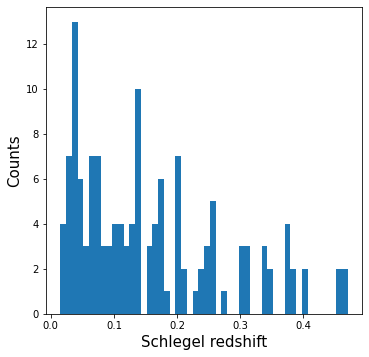

In [64]:
# fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios' : [1,1]})
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)

ax.hist(schlegel_zs, bins=50)    
ax.set_xlabel('Schlegel redshift', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)

# fig.savefig('Stripe-82/schlegelZ_redshift_hist.png')
pass

## Color Diagram

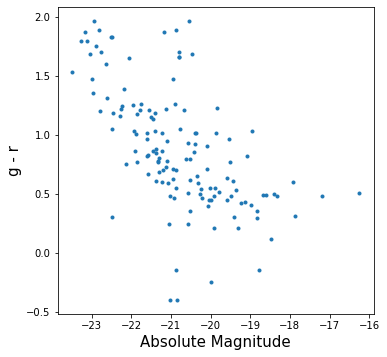

In [70]:
for band, lst in zip("ugriz", [us, gs, rs, iis, zs]) :
    fig, ax = plt.subplots(1,1)
    fig.tight_layout()
    fig.set_figheight(5)
    fig.set_figwidth(5)

    ax.hist(lst, bins=100)
    ax.set_xlabel(band)
    ax.set_ylabel('Counts')
    fig.savefig("Stripe-82/schleZ_{}_hist.png".format(band))
                
pass

## Photometric Distribution

In [ ]:
fig, ax = plt.subplots(5, 2, gridspec_kw={'width_ratios' : [1,1], 'height_ratios':[1,1,1,1,1]})
fig.tight_layout()
fig.set_figheight(12)
fig.set_figwidth(10)

for x,b in zip(range(5), "ugriz") :
    ax[x][0].hist(gz_data[1][b], bins=100)
    ax[x][1].hist(gz_data[2][b], bins=100)
    ax[x][0].set_xlabel("{}-{}".format(b, 1))
    ax[x][0].set_ylabel("Counts")
    ax[x][1].set_xlabel("{}-{}".format(b, 2))
    ax[x][1].set_ylabel("Counts")
    
# fig.savefig('Stripe-82/schlegelZ_photo_hists.png')
pass